First, setup parameters about insight we want to work on. 
 
Paste the input from Dashboard into the cell below. 

In [78]:
import os
os.environ["HOST"] = "https://gartner.fast-track.stg11.panther.intgdc.com/"
os.environ["WORKSPACE"] = "gartner"
os.environ["RESULT_ID"] = "eb62b17dc75078b2695053416fecd913da20b516"

Now prepare insight analyzer instance.

In [79]:
from insight_analyzer import *

analyzer = ClusterAnalyzer()

We are ready now. Let's get to work.
First fetch the dataframe from the server.

In [80]:
df = analyzer.get_df()

Let's see the data:

In [81]:
df.head(5)

,m_spendingscore_sum,m_annualincome_sum
Customerid,,
1,39,15
2,81,15
3,6,16
4,77,16
5,40,17


Awesome! Now let's see them in a plot!

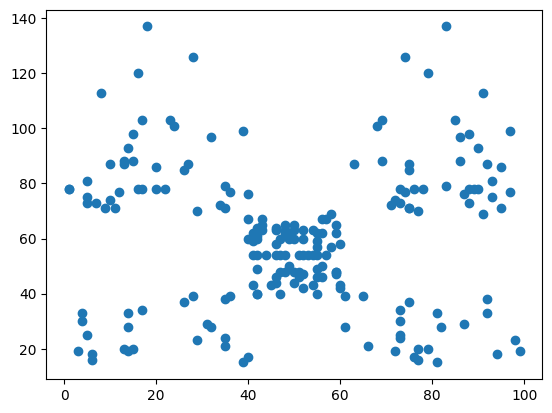

In [82]:
plt.scatter(
    df[df.columns[0]],
    df[df.columns[1]]
)
plt.show()

Ok, looks good. Let's set up our predictor!

In [83]:
# Threshold for cluster proximity, lower promotes splitting
threshold = 0.03

cluster_count = 3

# We need to update our DF to be compatible with Birch
x = np.column_stack((df[df.columns[0]], df[df.columns[1]]))

model = Birch(threshold=threshold, n_clusters=cluster_count)
yhat = model.fit_predict(x)


Now let's preview the clusters!

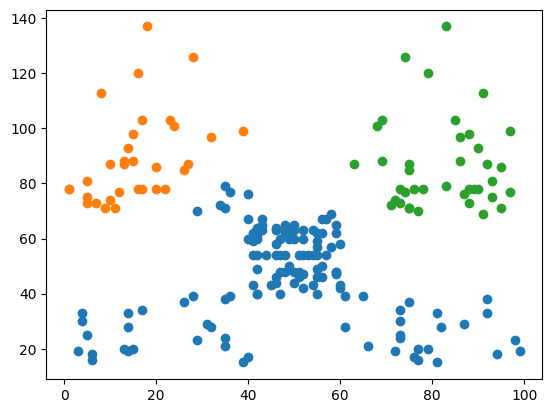

In [84]:
for cluster in np.unique(yhat):
    plt.scatter(df.values[yhat == cluster, 0], df.values[yhat == cluster, 1])
plt.show()

Altough this looks promising, we will get better results, if we normalize the coordinates. To do so, let's use the `MinMaxScaler`.

In [85]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
normalized_df = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df, columns=df.columns)


Ok, we can run our predictor again, with the same setting as before, so we do not change too much at a time.

In [86]:
from sklearn.cluster import Birch

# Threshold for cluster proximity, lower promotes splitting
threshold = 0.03

cluster_count = 3

# We need to update our DF to be compatible with Birch
x = np.column_stack(
    (normalized_df[normalized_df.columns[0]],
     normalized_df[normalized_df.columns[1]])
)

model = Birch(threshold=threshold, n_clusters=cluster_count)
yhat = model.fit_predict(x)

One last preview, before pushing the data to server.

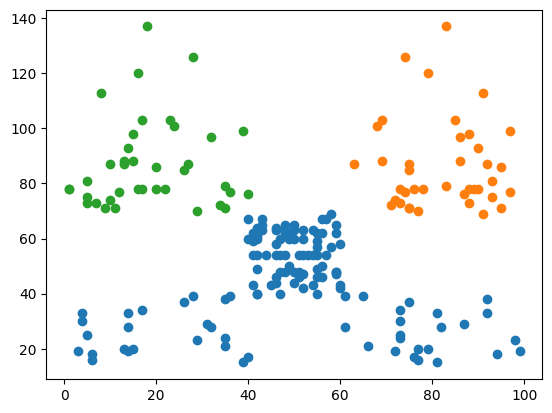

In [87]:
for cluster in np.unique(yhat):
    plt.scatter(df.values[yhat == cluster, 0], df.values[yhat == cluster, 1])
plt.show()

Awesome! Last thing to do now is to push it to the server, so we can see it on our dashboard.

In [88]:
analyzer.push_to_server(yhat)

Success!
